In [1]:
%config IPCompleter.greedy=True
import ROOT
import matplotlib.pyplot as plt
import numpy

from DataFormats.FWLite import Events, Handle
pythiaCP5_events = Events("RootFiles/WJets_CP5_withWeights.root")
pythiaCUETP8M1_events = Events("RootFiles/WJets_CUETP8M1_withWeights.root")
genJetsHandle = Handle("std::vector<reco::GenJet>")
genInfo = Handle("GenEventInfoProduct")
print "something happened"

Welcome to JupyROOT 6.12/07
something happened


In [4]:
def processEvents(events):
    num_constituents = []
    pt1_frac = []
    pt2_frac = []
    pt3_frac = []
    pt123_frac = []
    leading_pdgids = []
    psweights = []
    for i, event in enumerate(events):
        event.getByLabel ("slimmedGenJets", genJetsHandle)
        event.getByLabel ("generator", genInfo)
        central_weight = genInfo.product().weights()[0]
        weights = [w/central_weight for w in genInfo.product().weights()]
        psweights.append(weights[2:14])
        genJets = genJetsHandle.product()
        if genJets.size()==0:
            continue
        leading_jet = genJets.at(0)
        if leading_jet.pt() < 200:
            continue
        constits = leading_jet.getJetConstituentsQuick()
        num_constituents.append(constits.size())
        pt123 = 0
        for j, cand in enumerate(constits):
            if j < 1:
                pt1_frac.append(cand.pt()/leading_jet.pt())
                pt123 += cand.pt()
                leading_pdgids.append(cand.pdgId())
            elif j < 2: 
                pt2_frac.append(cand.pt()/leading_jet.pt())
                pt123 += cand.pt()
                leading_pdgids.append(cand.pdgId())
            elif j < 3:
                pt3_frac.append(cand.pt()/leading_jet.pt())
                pt123 += cand.pt()
                leading_pdgids.append(cand.pdgId())
            if j == constits.size()-1 or j == 2:
                pt123_frac.append(pt123/leading_jet.pt())
                break
    return (psweights, num_constituents, leading_pdgids, pt1_frac, pt2_frac, pt3_frac, pt123_frac)

In [5]:
weights_cp5, num_constituents_cp5, leading_pdgids_cp5, pt1_frac_cp5, pt2_frac_cp5, pt3_frac_cp5, pt123_frac_cp5 = processEvents(pythiaCP5_events)
weights, num_constituents, leading_pdgids, pt1_frac, pt2_frac, pt3_frac, pt123_frac = processEvents(pythiaCUETP8M1_events)

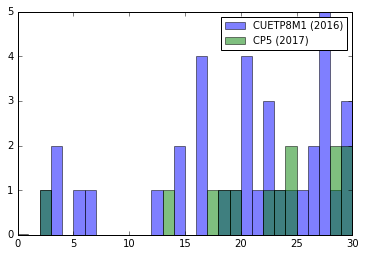

In [7]:
def makeVariationsPlot(var, weights, cp5_var, cp5_weights, bins, range, legloc, noPSweights=False):
    plt.hist(var, bins, range=range, histtype=('step' if noPSweights else 'bar'), alpha=0.5, label='CUETP8M1 (2016)');
    plt.hist(cp5_var, bins, range=range, histtype=('step' if noPSweights else 'bar'), alpha=0.5, label='CP5 (2017)');
    #if not noPSweights:
        #plt.hist([entry[0][0]*entry[1] for entry in zip(weights, var)], bins, range=range, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 1');
        #plt.hist([entry[0][1]*entry[1] for entry in zip(weights, var)], bins, range=range, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 2');
        #plt.hist([entry[0][2]*entry[1] for entry in zip(weights, var)], bins, range=range, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 3');
        #plt.hist([entry[0][3]*entry[1] for entry in zip(weights, var)], bins, range=range, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 4');
        #plt.hist([entry[0][4]*entry[1] for entry in zip(weights, var)], bins, range=range, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 5');
        #plt.hist([entry[0][5]*entry[1] for entry in zip(weights, var)], bins, range=range, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 6');
        #plt.hist([entry[0][6]*entry[1] for entry in zip(weights, var)], bins, range=range, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 7');
        #plt.hist([entry[0][7]*entry[1] for entry in zip(weights, var)], bins, range=range, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 8');
        #plt.hist([entry[0][8]*entry[1] for entry in zip(weights, var)], bins, range=range, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 9');
        #plt.hist([entry[0][9]*entry[1] for entry in zip(weights, var)], bins, range=range, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 10');
        #plt.hist([entry[0][10]*entry[1] for entry in zip(weights, var)], bins, range=range, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 11');
        #plt.hist([entry[0][11]*entry[1] for entry in zip(weights, var)], bins, range=range, histtype='step', alpha=0.5, label='CUETP8M1 (2016) PS weight 12');
    plt.legend(loc=legloc, prop={'size': 10})
    plt.show()
makeVariationsPlot(num_constituents, weights, num_constituents_cp5, weights_cp5, 30, (0,30),1)

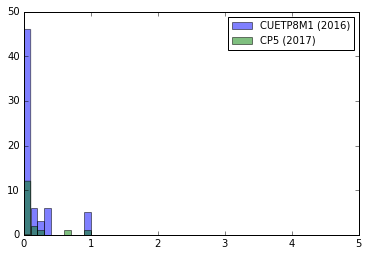

In [8]:
makeVariationsPlot(pt1_frac, weights, pt1_frac_cp5, weights_cp5, 50, (0,5),1)

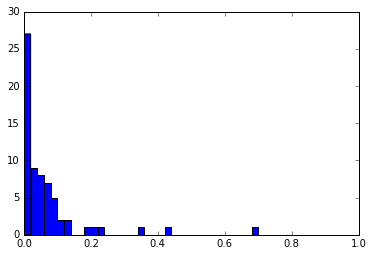

In [9]:
plt.hist(pt2_frac, bins=50, range=(0,1));

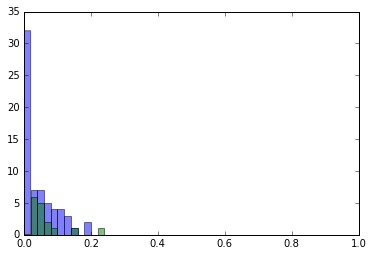

In [10]:
plt.hist(pt3_frac, bins=50, range=(0,1), alpha=0.5, label='CUETP8M1 (2016)');
plt.hist(pt3_frac_cp5, bins=50, range=(0,1), alpha=0.5, label='CP5 (2017)');

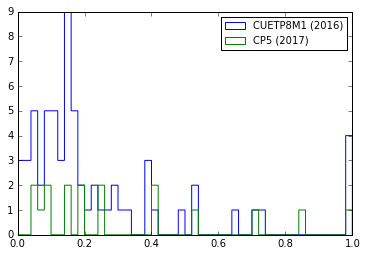

In [12]:
plt.hist(pt123_frac, 50, range=(0,1), histtype='step', label='CUETP8M1 (2016)');
plt.hist(pt123_frac_cp5, 50, range=(0,1), histtype='step', label='CP5 (2017)');
plt.legend(loc=1, prop={'size': 10})
plt.show()

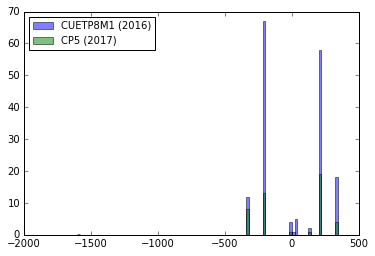

In [13]:
bins = 100
range=(-1600,400)
makeVariationsPlot(leading_pdgids, weights, leading_pdgids_cp5, weights_cp5, bins, range,2);

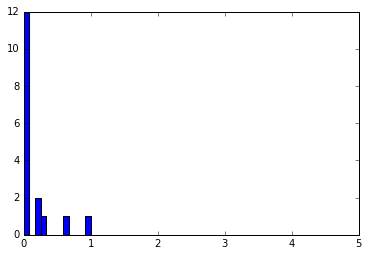

In [14]:
plt.hist(pt1_frac_cp5, bins=60, range=(0,5));

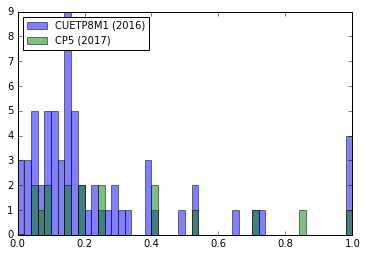

In [15]:
makeVariationsPlot(pt123_frac, weights, pt123_frac_cp5, weights_cp5, 50, (0,1),2)

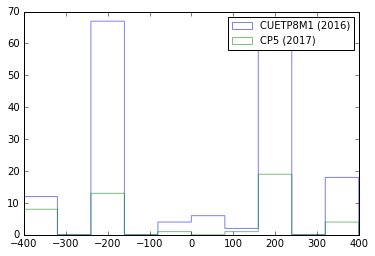

In [16]:
bins = 10
range=(-400,400)
makeVariationsPlot(leading_pdgids, weights, leading_pdgids_cp5, weights_cp5, bins, range,1, noPSweights=True);